# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [7]:
jobs = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
jobs.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [4]:
import flatiron_stats as fs

In [10]:
jobs['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

Master's degree                                                      6214
Bachelor's degree                                                    3704
Doctoral degree                                                      2576
Some college/university study without earning a bachelor's degree     675
Professional degree                                                   321
I did not complete any formal education past high school              227
I prefer not to answer                                                 83
Name: FormalEducation, dtype: int64

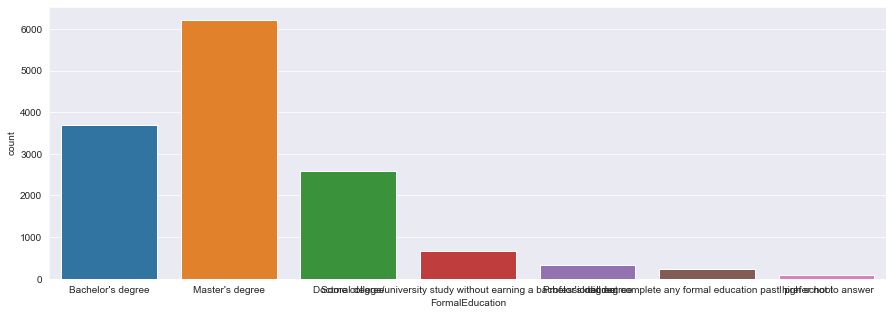

In [25]:
display(jobs[jobs['AdjustedCompensation'].isna()]['FormalEducation'].value_counts())
fig = plt.figure(figsize=(15,5))
sns.countplot(jobs[jobs['AdjustedCompensation'].isna()]['FormalEducation'])

Master's degree                                                      1990
Bachelor's degree                                                    1107
Doctoral degree                                                       967
Professional degree                                                   130
Some college/university study without earning a bachelor's degree     111
I did not complete any formal education past high school               30
I prefer not to answer                                                  7
Name: FormalEducation, dtype: int64

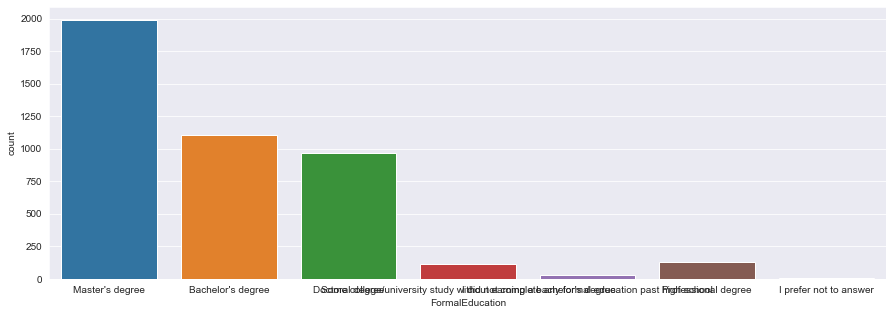

In [28]:
display(jobs[~jobs['AdjustedCompensation'].isna()]['FormalEducation'].value_counts())
fig = plt.figure(figsize=(15,5))
sns.countplot(jobs[~jobs['AdjustedCompensation'].isna()]['FormalEducation'])

Roughly speaking, the distribution remains the same without the null values. Because this exercise isn't about replacing them anyway, I won't.

In [41]:
jobs = jobs[~jobs['AdjustedCompensation'].isnull()]
Masters = (jobs[jobs['FormalEducation']=="Master's degree"]
           ['AdjustedCompensation'])
Bachs = (jobs[jobs['FormalEducation']=="Bachelor's degree"]
         ['AdjustedCompensation'])

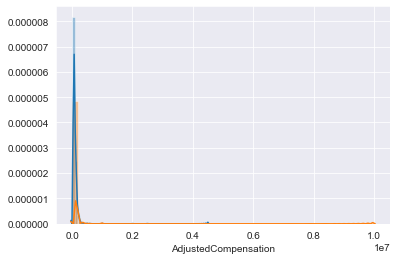

In [42]:
sns.distplot(Masters)
sns.distplot(Bachs)

In [43]:
import scipy.stats as stats
stats.ttest_ind(Masters, Bachs, equal_var=False)

Ttest_indResult(statistic=0.43786693335411514, pvalue=0.6615527890254489)

In [44]:
jobs_no_fliers = jobs[jobs['AdjustedCompensation']<250000]
Masters = (jobs_no_fliers[jobs_no_fliers['FormalEducation']=="Master's degree"]
           ['AdjustedCompensation'])
Bachs = (jobs_no_fliers[jobs_no_fliers['FormalEducation']=="Bachelor's degree"]
         ['AdjustedCompensation'])

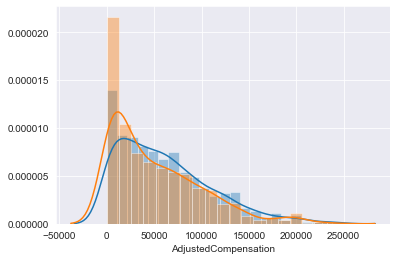

In [45]:
sns.distplot(Masters)
sns.distplot(Bachs)

In [48]:
print('Masters Mean: {}'.format(Masters.mean()))
print('Bachs Mean: {}'.format(Bachs.mean()))
stats.ttest_ind(Masters, Bachs, equal_var=False)

Masters Mean: 61532.142312309494
Bachs Mean: 51379.765978101466


Ttest_indResult(statistic=5.50206641342412, pvalue=4.170717701159277e-08)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [49]:
Docs = (jobs_no_fliers[jobs_no_fliers['FormalEducation']=="Doctoral degree"]
         ['AdjustedCompensation'])

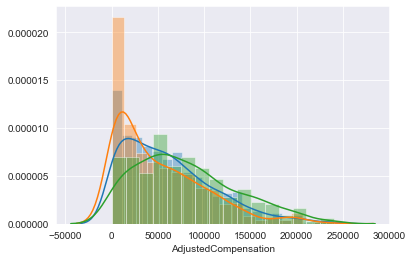

In [54]:
sns.distplot(Masters)
sns.distplot(Bachs)
sns.distplot(Docs)

In [55]:
print('Docs Mean: {}'.format(Docs.mean()))
print('Bachs Mean: {}'.format(Bachs.mean()))
stats.ttest_ind(Docs, Bachs, equal_var=False)

Docs Mean: 80192.020865822
Bachs Mean: 51379.765978101466


Ttest_indResult(statistic=12.464061987690766, pvalue=2.5120358070093788e-34)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, jobs_no_fliers).fit()
table=sm.stats.anova_lm(lm,typ=2)

print(table)

                          sum_sq      df         F        PR(>F)
C(FormalEducation)  4.390191e+11     6.0  28.40886  1.754282e-33
Residual            1.098236e+13  4264.0       NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!